# Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# algorithms
from algorithms.greedy_search import GreedySearch
from algorithms.epsilon_greedy import EpsilonGreedy
from algorithms.optimistic_greedy import OptimisticGreedy
from algorithms.gradient_bandit import GradientBandit

# Set Random Seed

In [2]:
np.random.seed(42)

# Experimental Runs

In [3]:
num_arms = 10
num_steps = 1000
num_runs = 1000

# a. Greedy Search + Nonoptimistic

In [4]:
average_reward_per_run = []
optimal_action_per_run = []

for run in range(num_runs):

    # create testbed using greedy search
    bandit = GreedySearch(num_arms= num_arms)

    # run experiment to obtain average reward and optimal action per step
    average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

    average_reward_per_run.append(average_reward_per_step)
    optimal_action_per_run.append(optimal_action_per_step)

# obtain the average of the runs
greedy_average_reward = np.mean(average_reward_per_run, axis= 0)
greedy_optimal_action = np.mean(optimal_action_per_run, axis=0)

# b. Epsilon Greedy

In [5]:
epsilon = 0.1
average_reward_per_run = []
optimal_action_per_run = []

for run in range(num_runs):

    # create testbed using epsilon-greedy search
    bandit = EpsilonGreedy(num_arms= num_arms, epsilon= epsilon)

    # run experiment to obtain average reward and optimal action per step
    average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

    average_reward_per_run.append(average_reward_per_step)
    optimal_action_per_run.append(optimal_action_per_step)

# obtain the average of the runs
epsilon_average_reward = np.mean(average_reward_per_run, axis= 0)
epsilon_optimal_action = np.mean(optimal_action_per_run, axis=0)

# c. Optimistic-Greedy Search

In [6]:
initial_value = 5.0
average_reward_per_run = []
optimal_action_per_run = []

for run in range(num_runs):

    # create testbed using optimistic-greedy search
    bandit = OptimisticGreedy(num_arms= num_arms, initial_value= initial_value)

    # run experiment to obtain average reward and optimal action per step
    average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

    average_reward_per_run.append(average_reward_per_step)
    optimal_action_per_run.append(optimal_action_per_step)

# obtain the average of the runs
optimistic_average_reward = np.mean(average_reward_per_run, axis= 0)
optimistic_optimal_action = np.mean(optimal_action_per_run, axis=0)

# d. Gradient Bandit

In [7]:
alpha = 0.2
optimal_action_per_run = []

for run in range(num_runs):

    # create testbed for gradient bandit
    bandit = GradientBandit(num_arms= num_arms, alpha= alpha)

    # run experiment to obtain average reward and optimal action per step
    optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

    optimal_action_per_run.append(optimal_action_per_step)

# obtain the average of the runs
gradient_optimal_action = np.mean(optimal_action_per_run, axis=0)

# Average Reward

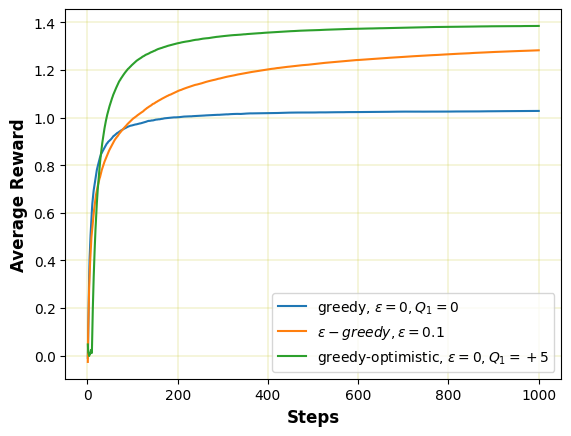

In [8]:
x = [i for i in range(1, num_steps+1)]
plt.plot(x, greedy_average_reward, label = 'greedy, $\epsilon = 0, Q_1 = 0$')
plt.plot(x, epsilon_average_reward, label = '$\epsilon-greedy, \epsilon = 0.1$')
plt.plot(x, optimistic_average_reward, label = 'greedy-optimistic, $\epsilon = 0, Q_1= +5$')
plt.legend()
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

# Percentage Optimal Action

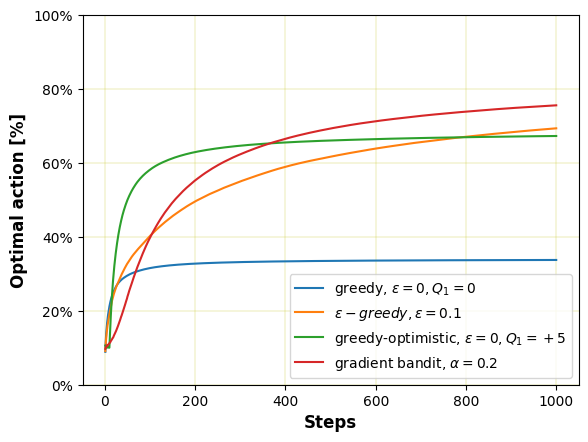

In [9]:
x = [i for i in range(1, num_steps+1)]
plt.plot(x, greedy_optimal_action, label = 'greedy, $\epsilon = 0, Q_1 = 0$')
plt.plot(x, epsilon_optimal_action, label = '$\epsilon-greedy, \epsilon = 0.1$')
plt.plot(x, optimistic_optimal_action, label = 'greedy-optimistic, $\epsilon = 0, Q_1= +5$')
plt.plot(x, gradient_optimal_action, label = 'gradient bandit, $\\alpha = 0.2$')
plt.legend()
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Optimal action [%]', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)